In [45]:
from si import *

In [46]:
f = r.TFile("./data/gm2offline_ana.root")
f.cd("clustersAndCoincidences")
#f.ls()

True

In [47]:
hist = f.Get("clustersAndCoincidences/clusters_kernel")#.Clone("hist")

In [48]:
cov = f.Get("clustersAndCoincidences/covariance")

In [65]:
#c = r.TCanvas()
ding = cov.Projection(0,1)#.Clone()
#ding.Rebin2D(6,6)
print(ding)
print(type(ding))
#ding.Draw("colz")
#c.SetLogy()
#c.Draw()

Name: covariance_proj_1_0 Title: covariance matrix for the kernel method projection  time bin 2 time bin 1 NbinsX: 4692
<class 'ROOT.TH2D'>


Warning in <TDirectoryFile::Append>: Replacing existing TH1: covariance_proj_1_0 (Potential memory leak).


In [67]:
%%time
import scipy.sparse as sparse

#array = ding.Clone("array")
#array.Reset()
array = sparse.lil_matrix((ding.GetNbinsX(), ding.GetNbinsY()))
print(array.size)
#array = np.zeros((ding.GetNbinsX(), ding.GetNbinsY()), dtype=int)
for i in range(1,ding.GetNbinsX()+1):
    for j in range(i-10,i+10):
        if (i == j-10000 or j < 1):
            continue
        content = ding.GetBinContent(i,j)
        reverse_content = ding.GetBinContent(j,i)
        if content > 0:
            array[i,j] = content
            #array.SetBinContent(i,j,content)
#             if(content != reverse_content and reverse_content > 0):
#                 print(i, j, content, reverse_content)

0


IndexError: row index (4692) out of bounds

In [75]:
%%time
import scipy.sparse as sparse

#array = ding.Clone("array")
#array.Reset()
array = sparse.lil_matrix((ding.GetNbinsX(), ding.GetNbinsY()))
#array = np.zeros((ding.GetNbinsX(), ding.GetNbinsY()), dtype=int)

for i in range(0,ding.GetNbinsX()-1):
    content = ding.GetBinContent(i+1,i+1)
    array[i,i] = content
    array[i,i+1] = content/6.
    array[i,i-1] = content/6.

CPU times: user 53.6 ms, sys: 256 µs, total: 53.8 ms
Wall time: 50.6 ms


In [76]:
array[90:100,90:100].todense()

matrix([[570.        ,  95.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [ 98.        , 588.        ,  98.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  99.        , 594.        ,  99.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        , 100.        , 600.        ,
         100.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,  95.        ,
         570.        ,  95.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
          99.16666667, 595.        ,  99.16666667,   0.        ,
           0.        ,   0.   

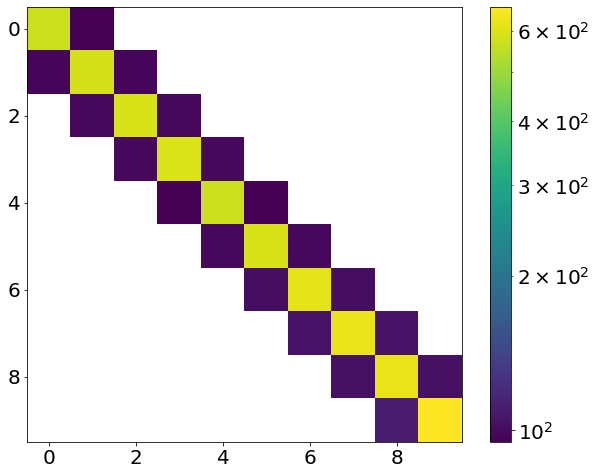

In [77]:
fig,ax = plt.subplots(figsize=(10,8))
plt.imshow(array[90:100,90:100].todense(), 
           norm = matplotlib.colors.LogNorm()
          )
# plt.xlim(90,100)
# plt.ylim(90,100)
plt.colorbar()
plt.show()

In [78]:
inv_array = scipy.sparse.linalg.inv(array)

/home/jlab/miniconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


RuntimeError: failed to factorize matrix at line 413 in file scipy/sparse/linalg/dsolve/SuperLU/SRC/dpanel_bmod.c


In [ ]:
np.sum(inv_array)

In [ ]:
inv_array[90:100,90:100]

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
plt.imshow(inv_array[90:100,90:100], 
           #norm = matplotlib.colors.LogNorm()
          )
# plt.xlim(90,100)
# plt.ylim(90,100)
plt.colorbar()
plt.show()